In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

from pylab import rcParams
rcParams['pdf.fonttype'] = 42

In [3]:
import numpy as np

### Plot ideogram

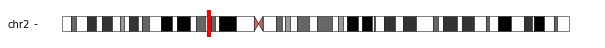

In [4]:
from genome_tools import plotting

fig,ax=plt.subplots()

plotting.ideogram().render(ax, "chr2", 70000000)

fig.set_size_inches(10, 0.5)

### Plot motif logo

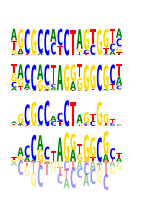

In [5]:
fig=plt.figure()

#You must set the figure size first, otherwise it will not render PWM properly
fig.set_size_inches(2, 3)

gs=gridspec.GridSpec(4, 1, height_ratios=[1,1,1,2])

mat=np.loadtxt("/home/jvierstra/data/motifs/moods/GRCh38_no_alts.alldbs.1e-4/pfm/CTCF_C2H2_1.pfm")

# default
ax=fig.add_subplot(gs[0,0])
plotting.pwm(mat).render(fig, ax, type='def')

# reverse-complement
ax=fig.add_subplot(gs[1,0])
plotting.pwm(mat).render(fig, ax, type='def', rc=True)

# bit-score style
ax=fig.add_subplot(gs[2,0])
plotting.pwm(mat).render(fig, ax, type='ic')

# affinity style
ax=fig.add_subplot(gs[3,0])
plotting.pwm(mat).render(fig, ax, type='affinity', rc=True)

### Plot regions of the genome


#### 1a. Define a region of the genome using the `genomic_interval` class

In [6]:
from genome_tools import genomic_interval
interval=genomic_interval("chr19", 48363826, 48364602)

#### 1b. Load DNase I data directly from BAM-formated sequence alignment file

In [7]:
from footprint_tools import cutcounts

data=cutcounts.bamfile("/net/seq/data/data-release/encode3/pipeline/human-encode2-GRCh38/alignments_full/hTR-DS14702.GRCh38.bam")
cuts=data[interval.widen(1)]
summed_cuts=(cuts['+'][1:] + cuts['-'][:-1])[:-1]

assert(len(summed_cuts)==len(interval))


#### 2. Render the data

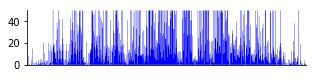

In [8]:
from genome_tools.plotting import continuous_data_track

fig,ax=plt.subplots()
fig.set_size_inches(5, 1)

track=continuous_data_track(interval, summed_cuts, fill_between=0, min=0, max=50)
track.render(ax)

## Plot gene annotation track and data

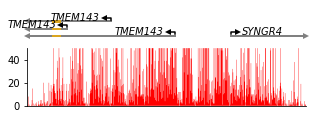

In [9]:
from genome_tools.plotting import gencode_annotation_track

fig=plt.figure()
fig.set_size_inches(5, 1.75)

gs=gridspec.GridSpec(2, 1, height_ratios=[0.5, 1])

ax=fig.add_subplot(gs[0,0])
track=gencode_annotation_track(interval)
track.load_data("/home/jvierstra/data/genomes/hg38/gencode.v25.chr_patch_hapl_scaff.basic.annotation.gff3.gz")
track.render(ax)

ax=fig.add_subplot(gs[1,0])
track=continuous_data_track(interval, summed_cuts, fill_between=0, min=0, max=50, facecolor="red")
track.render(ax)

## Plot chromsome, ideogram, gene annotation and data

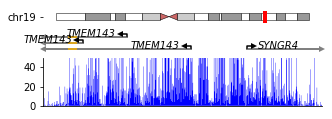

In [10]:
from genome_tools.plotting import gencode_annotation_track

fig=plt.figure()
fig.set_size_inches(5, 1.75)

gs=gridspec.GridSpec(3, 1, height_ratios=[0.25, 0.5, 1])

# Chromosome ideogram
ax=fig.add_subplot(gs[0,0])
plotting.ideogram().render(ax, interval.chrom, interval.start)

# GENCODE gene annotation track
ax=fig.add_subplot(gs[1,0])
track=gencode_annotation_track(interval)
track.load_data("/home/jvierstra/data/genomes/hg38/gencode.v25.chr_patch_hapl_scaff.basic.annotation.gff3.gz")
track.render(ax)

# DNase I per-nucleotide cleavage data
ax=fig.add_subplot(gs[2,0])
track=continuous_data_track(interval, summed_cuts, fill_between=0, min=0, max=50)
track.render(ax)

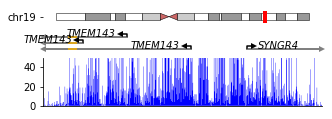

In [11]:
from genome_tools.plotting import gencode_annotation_track

fig=plt.figure()
fig.set_size_inches(5, 1.75)

gs=gridspec.GridSpec(3, 1, height_ratios=[0.25, 0.5, 1])

# Chromosome ideogram
ax=fig.add_subplot(gs[0,0])
plotting.ideogram().render(ax, interval.chrom, interval.start)

# GENCODE gene annotation track
ax=fig.add_subplot(gs[1,0])
track=gencode_annotation_track(interval)
track.load_data("/home/jvierstra/data/genomes/hg38/gencode.v25.chr_patch_hapl_scaff.basic.annotation.gff3.gz")
track.render(ax)

# DNase I per-nucleotide cleavage data
ax=fig.add_subplot(gs[2,0])
track=continuous_data_track(interval, summed_cuts, fill_between=0, min=0, max=50)
track.render(ax)

## Plot large regions using density smooting

In [12]:
interval_lg = interval.widen(50000)

cuts=data[interval_lg.widen(1)]
summed_cuts=(cuts['+'][1:] + cuts['-'][:-1])[:-1]

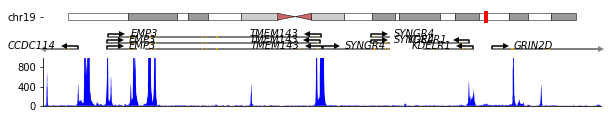

In [22]:
from genome_tools.plotting import gencode_annotation_track

fig=plt.figure()
fig.set_size_inches(10, 1.75)

gs=gridspec.GridSpec(3, 1, height_ratios=[0.25, 0.5, 1])

# Chromosome ideogram
ax=fig.add_subplot(gs[0,0])
plotting.ideogram().render(ax, interval_lg.chrom, interval_lg.start)

# GENCODE gene annotation track
ax=fig.add_subplot(gs[1,0])
track=gencode_annotation_track(interval_lg)
track.load_data("/home/jvierstra/data/genomes/hg38/gencode.v25.chr_patch_hapl_scaff.basic.annotation.gff3.gz")
track.render(ax)

# DNase I per-nucleotide cleavage data
ax=fig.add_subplot(gs[2,0])
track=continuous_data_track(interval_lg, summed_cuts, density=True, fill_between=0, min=0, max=1000)
track.render(ax)